[Lecture](https://youtu.be/4rR-tCwTc4c)


[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/aimlds1_08-UnsupervisedLearning/blob/master/M08_CCS0--TC--Solution_of_Implementing_K_Means_CC.ipynb)

## In this CC, we will implement K-Means clustering algorithm from scratch

Objectives:
1. Be able to list and understand steps of K-Mean algorithm
2. Be able to implement those steps.
3. Understand their computational complexity

For a deeper look into k-means, take a look at https://en.wikipedia.org/wiki/K-means_clustering

### Pseudo-Code:

1. Pick a random starting point $c_k$for k clusters.
2. For each point, add it to the set $S_k$ of the centroid $c_k$ it is closest to.
3. Recompute each $c_k$ as the mean (centroid) of each set $S_k$.
4. Do until $c_k$ doesn't change for any $k$ (or max iter is hit).

In [ ]:

'''
K-means steps:
    Pick a random starting point c_k for k clusters
    For each point, add it to the set S_k of the centroid it is closest to
    Recompute c_k as the mean (centroid of the set S_k)
    Do until c_k doesn't change for any k
    
    
For large collections of points iteration till convergence can take very long time.
Some predefined number of iterations is used to make it feasible
'''

# Set up some hyper-parameters:

max_iterations = 5000
k = 3

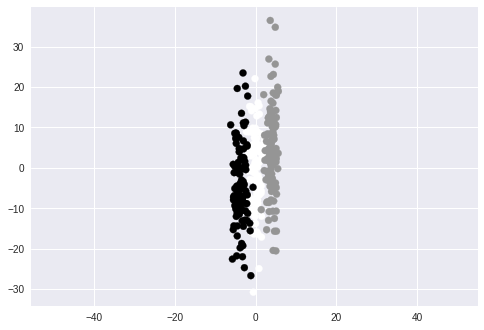

In [46]:
# Define some points in 3 clusters and plot them
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

points = np.vstack(((np.random.multivariate_normal([0, 0], [[1, 0], [0, 100]] , 100)),
                  (np.random.multivariate_normal([4, 4], [[1, 0], [0, 100]] , 100)),
                  (np.random.multivariate_normal([-4, -4], [[1, 0], [0, 100]] , 100))))
true_class_colors = np.hstack((np.ones(100),np.ones(100)*2,np.ones(100)*3))

plt.scatter(points[:, 0], points[:, 1],c=true_class_colors)
plt.axes().set_aspect('equal', 'datalim')

# The colors are the "true classes", which we will see unsupervised learning does not
# discover effectively (with this algorithm).

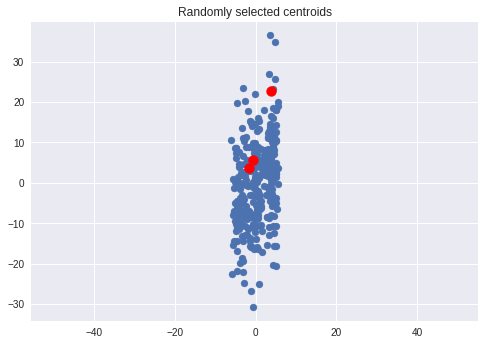

In [47]:
# Choose k random points from the set to be our starting "centroids"
def get_random_centroids(points,number):
    return points[np.random.permutation(len(points))[0:number]]

centroids = get_random_centroids(points,k)
plt.scatter(points[:, 0], points[:, 1])
plt.axes().set_aspect('equal', 'datalim')
plt.title('Randomly selected centroids')
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

# Plotting the original randomly selected centroids

[2. 1. 2. 0. 2. 2. 2. 2. 0. 2. 2. 2. 0. 2. 0. 2. 2. 2. 2. 2. 2. 0. 0. 2.
 2. 0. 0. 2. 1. 1. 2. 1. 0. 0. 2. 1. 0. 0. 2. 1. 2. 2. 2. 2. 0. 2. 1. 2.
 2. 0. 2. 2. 2. 0. 1. 2. 2. 2. 0. 0. 2. 2. 0. 2. 2. 0. 2. 2. 2. 0. 0. 2.
 1. 0. 2. 2. 2. 1. 0. 1. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 2. 0. 0. 2. 2. 2.
 2. 0. 2. 1. 1. 2. 1. 1. 2. 0. 2. 1. 1. 1. 0. 1. 2. 1. 1. 1. 2. 1. 0. 2.
 0. 2. 2. 0. 2. 2. 0. 2. 2. 2. 2. 1. 0. 1. 2. 0. 2. 2. 1. 0. 2. 0. 2. 1.
 2. 2. 1. 1. 0. 1. 1. 0. 1. 2. 2. 2. 2. 0. 0. 2. 0. 0. 1. 0. 1. 2. 1. 1.
 1. 0. 0. 0. 1. 1. 2. 0. 1. 1. 0. 2. 0. 2. 0. 2. 2. 1. 2. 1. 2. 0. 2. 0.
 2. 2. 1. 1. 1. 2. 2. 0. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2.
 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 0. 2. 1. 2. 0. 2.
 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2.
 2. 2. 2. 2. 0. 2. 2. 2. 2. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0.
 2. 2. 2. 2. 2. 2. 2. 0. 2. 1. 2. 2.]


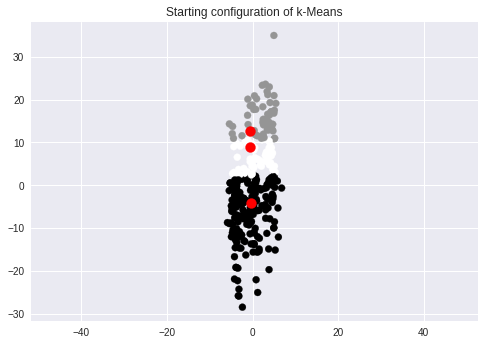

In [38]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

def get_nearest_centroid_for_all_points(points,centroids):
    clusters = np.zeros(len(points))
    for i in range(len(points)):
        distances = dist(points[i], centroids)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    return clusters

print(get_nearest_centroid_for_all_points(points,centroids))
closest = get_nearest_centroid_for_all_points(points,centroids)

# closest above: the nearest centroid for each point p_i

plt.scatter(points[:, 0], points[:, 1],c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)    
plt.axes().set_aspect('equal', 'datalim')
plt.title('Starting configuration of k-Means')
plt.show()

3
[[ 0.85293118  6.32213628]
 [ 2.0751981  16.10218923]
 [-0.76354526 -6.57196777]]


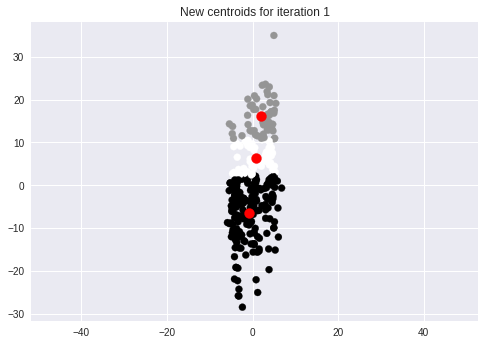

In [39]:
# Recalculate the centroids for each cluster based on the points that were added
# to it.
def move_centroids(points,closest,centroids):
    print(centroids.shape[0])
    for k in range(centroids.shape[0]):
        cluster = points[closest==k]
        centroids[k] = cluster.mean(axis=0)
    return centroids

new_centroids = move_centroids(points,closest,centroids)
print(new_centroids)
plt.scatter(points[:, 0], points[:, 1],c=closest)
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='r', s=100)    
plt.axes().set_aspect('equal', 'datalim')
plt.title('New centroids for iteration 1')
plt.show()

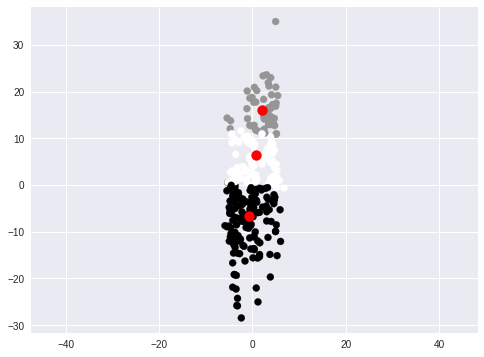

3


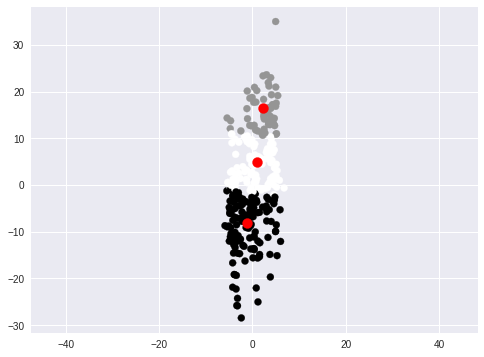

3


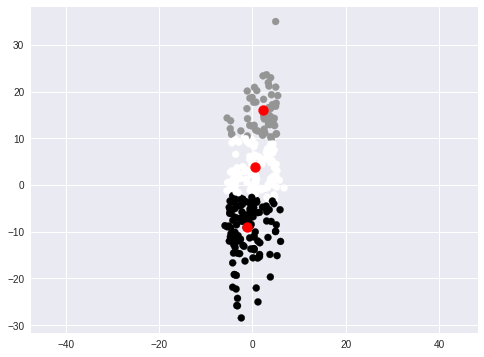

3


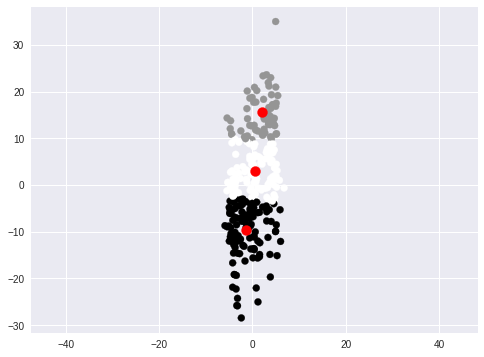

3


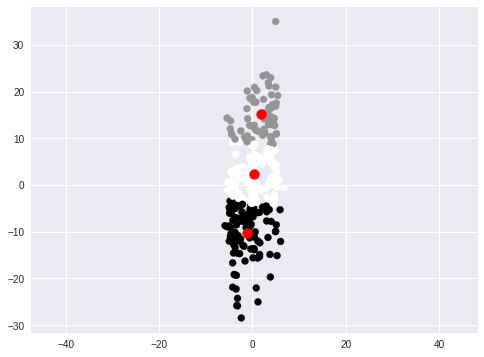

3


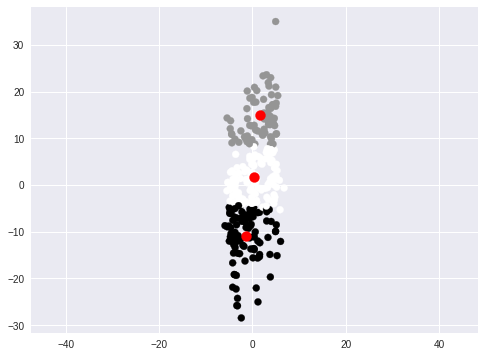

3


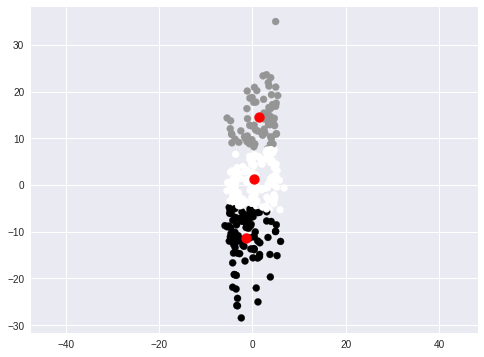

3


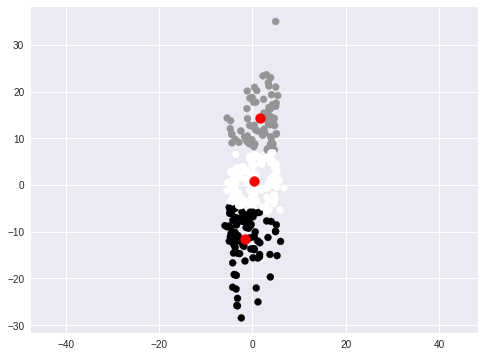

3


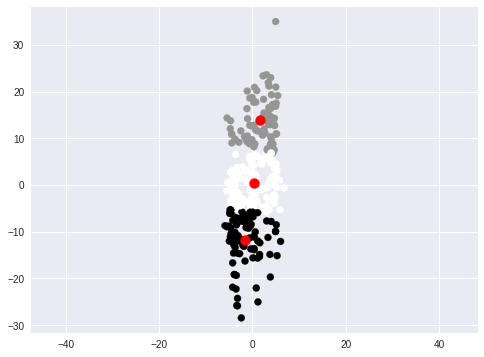

3


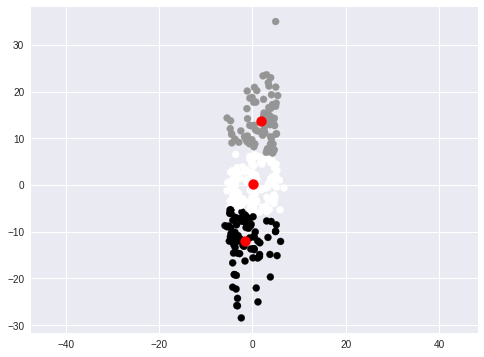

3


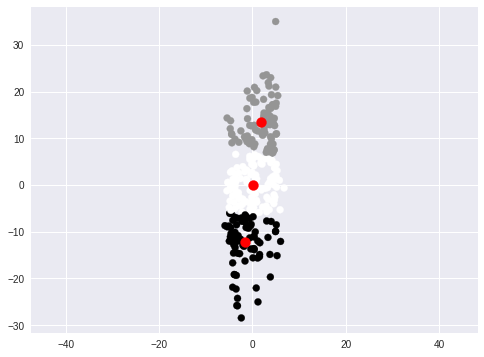

3


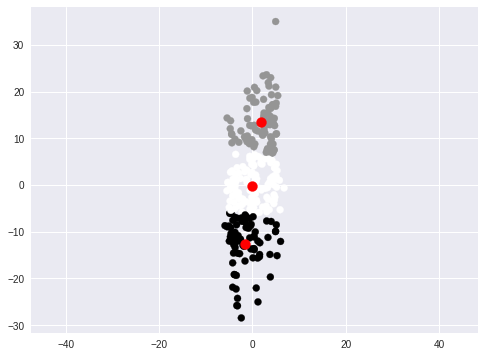

3
Clusters converged in 11 iterations


In [40]:
last_closest = []
for i in range(max_iterations):
    closest = get_nearest_centroid_for_all_points(points,centroids)
    plt.figure(figsize=(8,6))
    plt.axes().set_aspect('equal', 'datalim')
    plt.scatter(points[:, 0], points[:, 1],c=closest)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)    
    plt.show()
    centroids = move_centroids(points, closest, centroids)
    if(np.array_equal(last_closest,closest)):
        print('Clusters converged in %d iterations' % i)
        break
    last_closest = closest

In [41]:
print(centroids)

[[ -0.03207884  -0.16925228]
 [  1.82709901  13.51778555]
 [ -1.47443605 -12.5982216 ]]


### The super-easy case

Text(0.5,1,u'Dataset that plays nicely with k-Means')

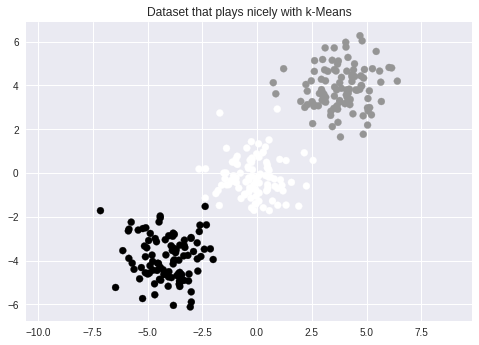

In [57]:
points = np.vstack(((np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]] , 100)),
                  (np.random.multivariate_normal([4, 4], [[1, 0], [0, 1]] , 100)),
                  (np.random.multivariate_normal([-4, -4], [[1, 0], [0, 1]] , 100))))
true_class_colors = np.hstack((np.ones(100),np.ones(100)*2,np.ones(100)*3))

plt.scatter(points[:, 0], points[:, 1],c=true_class_colors)
plt.axes().set_aspect('equal', 'datalim')
plt.title('Dataset that plays nicely with k-Means')

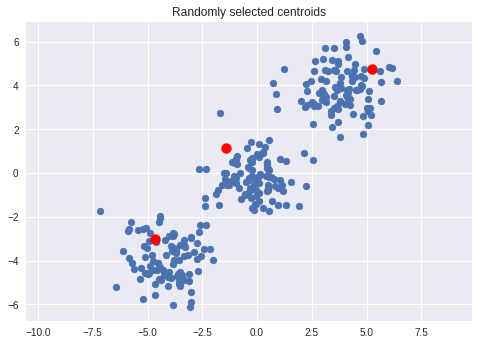

In [58]:
centroids = get_random_centroids(points,k)
plt.scatter(points[:, 0], points[:, 1])
plt.axes().set_aspect('equal', 'datalim')
plt.title('Randomly selected centroids')
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

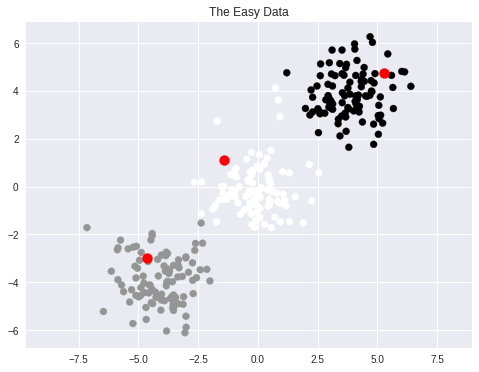

3


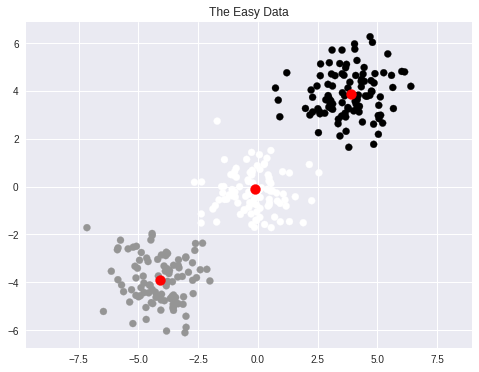

3


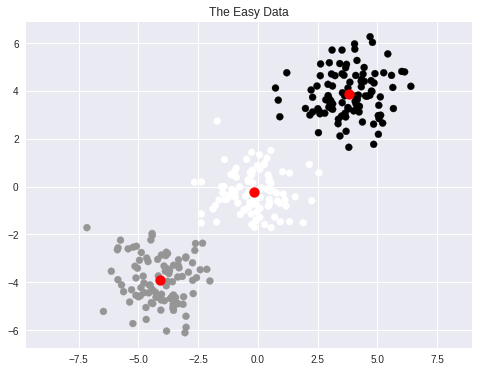

3
Clusters converged in 2 iterations


In [59]:
last_closest = []
for i in range(max_iterations):
    closest = get_nearest_centroid_for_all_points(points,centroids)
    plt.figure(figsize=(8,6))
    plt.axes().set_aspect('equal', 'datalim')
    plt.scatter(points[:, 0], points[:, 1],c=closest)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)    
    plt.title('The Easy Data')
    plt.show()
    centroids = move_centroids(points, closest, centroids)
    if(np.array_equal(last_closest,closest)):
        print('Clusters converged in %d iterations' % i)
        break
    last_closest = closest

In [55]:
print(centroids)

[[ 0.11459649  0.09922187]
 [-4.0762458  -4.14154647]
 [ 3.95462439  4.02632836]]


#### Wow so easy


### The less easy case

Text(0.5,1,u'Dataset that plays nicely with k-Means')

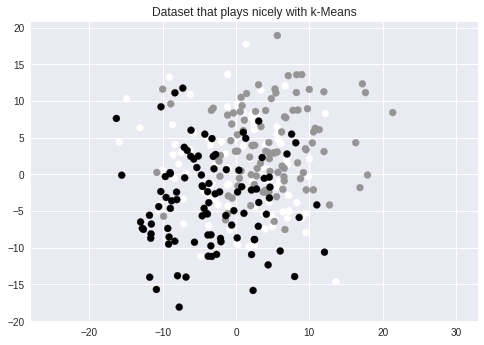

In [73]:
points = np.vstack(((np.random.multivariate_normal([0, 0], [[35, 0], [0, 35]] , 100)),
                  (np.random.multivariate_normal([4, 4], [[35, 0], [0, 35]] , 100)),
                  (np.random.multivariate_normal([-4, -4], [[35, 0], [0, 35]] , 100))))
true_class_colors = np.hstack((np.ones(100)*0,np.ones(100)*1,np.ones(100)*2))

plt.scatter(points[:, 0], points[:, 1],c=true_class_colors)
plt.axes().set_aspect('equal', 'datalim')
plt.title('Dataset that plays nicely with k-Means')

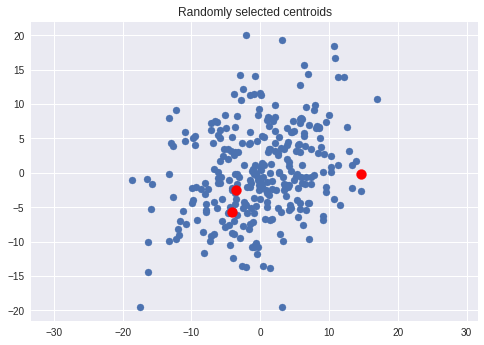

In [64]:
centroids = get_random_centroids(points,k)
plt.scatter(points[:, 0], points[:, 1])
plt.axes().set_aspect('equal', 'datalim')
plt.title('Randomly selected centroids')
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

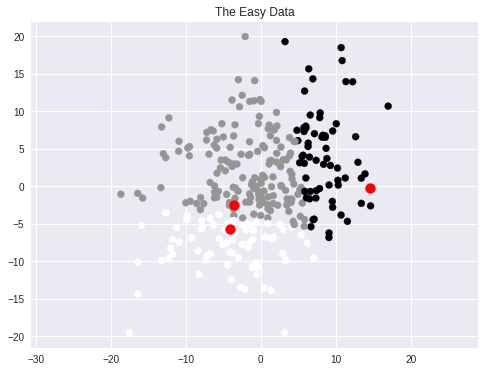

3


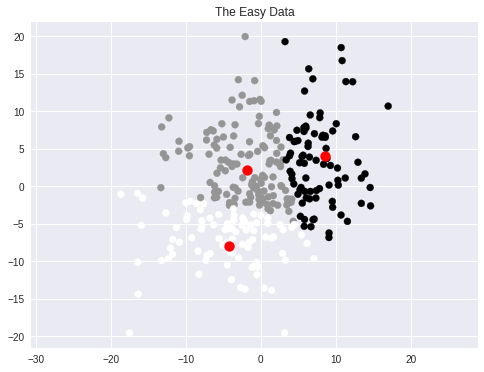

3


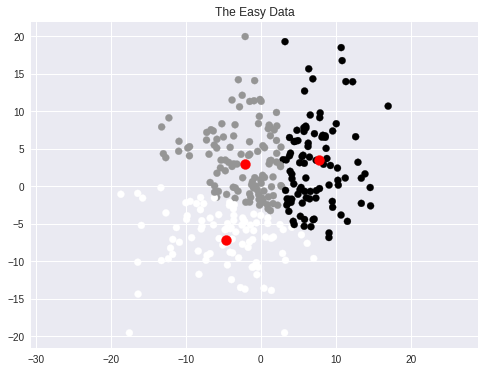

3


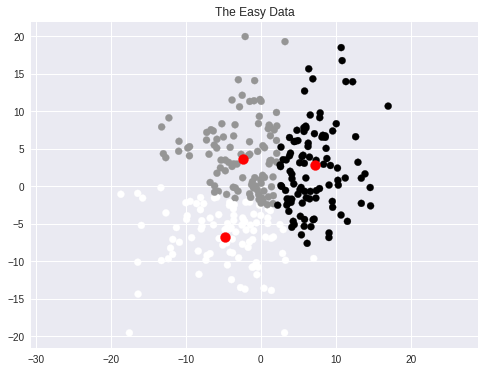

3


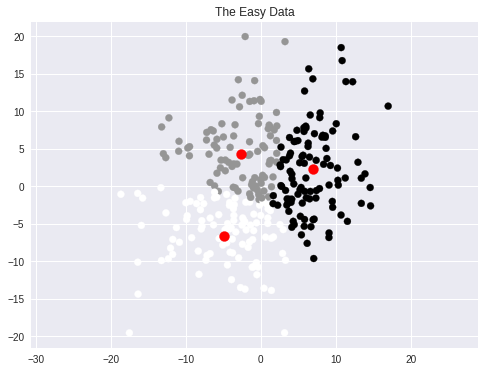

3


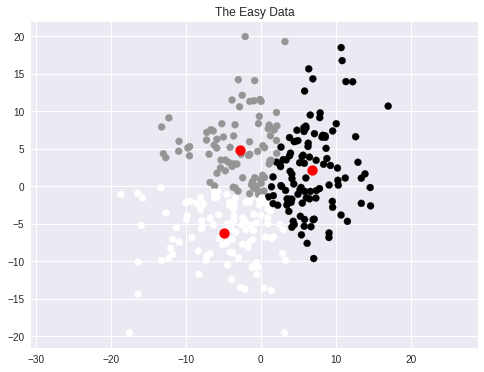

3


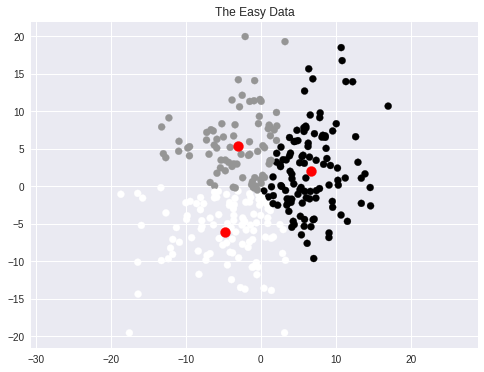

3


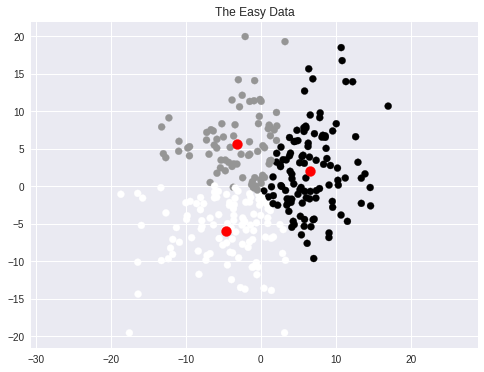

3


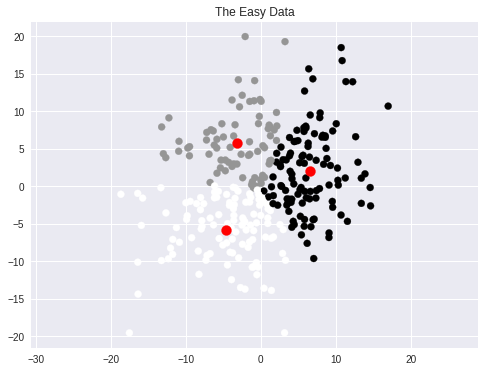

3


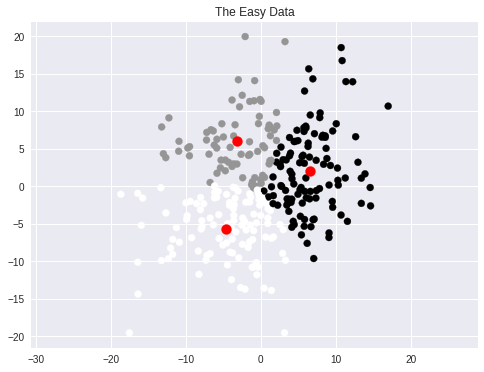

3
Clusters converged in 9 iterations


In [65]:
last_closest = []
for i in range(max_iterations):
    closest = get_nearest_centroid_for_all_points(points,centroids)
    plt.figure(figsize=(8,6))
    plt.axes().set_aspect('equal', 'datalim')
    plt.scatter(points[:, 0], points[:, 1],c=closest)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)    
    plt.title('The Easy Data')
    plt.show()
    centroids = move_centroids(points, closest, centroids)
    if(np.array_equal(last_closest,closest)):
        print('Clusters converged in %d iterations' % i)
        break
    last_closest = closest

In [66]:
print(centroids)

[[-4.61450128 -5.73129914]
 [-3.19892388  6.00125283]
 [ 6.60606047  2.07244884]]
